In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/dc_evt_modified2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86180 entries, 0 to 86179
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  86180 non-null  int64  
 1   inode                       86180 non-null  int64  
 2   id                          86180 non-null  object 
 3   datetime                    86180 non-null  object 
 4   computer_name               86180 non-null  object 
 5   source_name                 86180 non-null  object 
 6   filename_type               86180 non-null  object 
 7   filename_security           86180 non-null  int64  
 8   filename_application        86180 non-null  int64  
 9   filename_system             86180 non-null  int64  
 10  filename_rdp                86180 non-null  int64  
 11  filename_powershell         86180 non-null  int64  
 12  filename_other              86180 non-null  int64  
 13  recovered                   861

/tmp/ipykernel_9130/2960400418.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/dc_evt_modified2.csv')


In [3]:
df.head()

,Unnamed: 0,inode,id,datetime,computer_name,source_name,filename_type,filename_security,filename_application,filename_system,...,keywords_audit_success,keywords_correlation_hint,keywords_event_log_classic,keywords_sqm,keywords_wdi_context,keywords_wdi_diagnostic,timestamp,epochtime,hour,minute
0,0,75250,abf64018-0fe1-4766-991a-a1819f0d1c10,2014-03-21 19:14:08,WIN-HRJHA99CCDO,Service Control Manager,Other,0,0,0,...,0,0,1,0,0,0,2014-03-21 19:14:08,1.395429e+09,19,14
1,1,84704,77ae245c-32ec-4ba0-b817-3aaa13134904,2014-03-21 19:14:08,WIN-HRJHA99CCDO,Service Control Manager,System,0,0,1,...,0,0,1,0,0,0,2014-03-21 19:14:08,1.395429e+09,19,14
2,2,75250,e342bf6a-d605-465a-ab22-101302a379f1,2014-03-21 19:14:09,WIN-HRJHA99CCDO,Service Control Manager,Other,0,0,0,...,0,0,1,0,0,0,2014-03-21 19:14:09,1.395429e+09,19,14
3,3,84704,081213ec-b1cf-44d6-9e73-c7184f7857e3,2014-03-21 19:14:09,WIN-HRJHA99CCDO,Service Control Manager,System,0,0,1,...,0,0,1,0,0,0,2014-03-21 19:14:09,1.395429e+09,19,14
4,4,75250,a8575b92-4814-43d0-acce-6ef018a97c3f,2014-03-21 19:14:09,WIN-HRJHA99CCDO,Microsoft-Windows-Kernel-Power,Other,0,0,0,...,0,0,1,0,0,0,2014-03-21 19:14:09,1.395429e+09,19,14


<Axes: xlabel='computer_name', ylabel='count'>

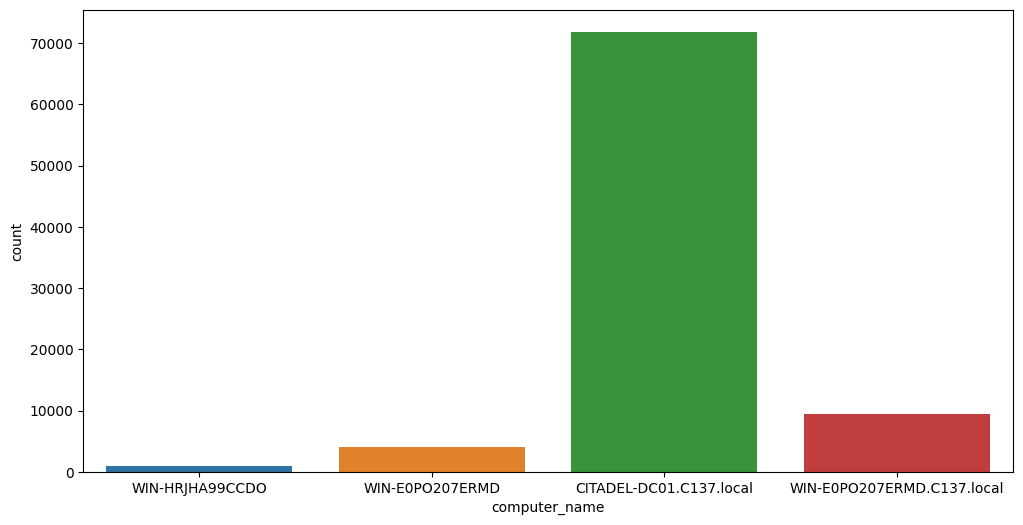

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='computer_name', data=df)

In [16]:
df['source_name'].value_counts()

 Schannel                                                       58410
 Microsoft-Windows-Security-Auditing                             8564
 Microsoft-Windows-GroupPolicy                                   4037
 Microsoft-Windows-RemoteDesktopServices-RdpCoreTS               2124
 Microsoft-Windows-TerminalServices-RemoteConnectionManager      2051
                                                                ...  
 LsaSrv                                                             1
 Application Popup                                                  1
 Microsoft-Windows-NlaSvc                                           1
 Microsoft-Windows-AppXDeployment                                   1
 MSDTC Client 2                                                     1
Name: source_name, Length: 118, dtype: int64

Příznak reprezentuje zdroj logů, pokusíme se jej zohlednit pomocí One hot encoding

In [21]:
important_sources = df['source_name'].value_counts()[:5].index
for source in important_sources:
    df["Log source: " + source] = df['source_name'] == source
df.head()

,Unnamed: 0,inode,id,datetime,computer_name,source_name,filename_type,filename_security,filename_application,filename_system,...,keywords_wdi_diagnostic,timestamp,epochtime,hour,minute,Log source: Schannel,Log source: Microsoft-Windows-Security-Auditing,Log source: Microsoft-Windows-GroupPolicy,Log source: Microsoft-Windows-RemoteDesktopServices-RdpCoreTS,Log source: Microsoft-Windows-TerminalServices-RemoteConnectionManager
0,0,75250,abf64018-0fe1-4766-991a-a1819f0d1c10,2014-03-21 19:14:08,WIN-HRJHA99CCDO,Service Control Manager,Other,0,0,0,...,0,2014-03-21 19:14:08,1.395429e+09,19,14,False,False,False,False,False
1,1,84704,77ae245c-32ec-4ba0-b817-3aaa13134904,2014-03-21 19:14:08,WIN-HRJHA99CCDO,Service Control Manager,System,0,0,1,...,0,2014-03-21 19:14:08,1.395429e+09,19,14,False,False,False,False,False
2,2,75250,e342bf6a-d605-465a-ab22-101302a379f1,2014-03-21 19:14:09,WIN-HRJHA99CCDO,Service Control Manager,Other,0,0,0,...,0,2014-03-21 19:14:09,1.395429e+09,19,14,False,False,False,False,False
3,3,84704,081213ec-b1cf-44d6-9e73-c7184f7857e3,2014-03-21 19:14:09,WIN-HRJHA99CCDO,Service Control Manager,System,0,0,1,...,0,2014-03-21 19:14:09,1.395429e+09,19,14,False,False,False,False,False
4,4,75250,a8575b92-4814-43d0-acce-6ef018a97c3f,2014-03-21 19:14:09,WIN-HRJHA99CCDO,Microsoft-Windows-Kernel-Power,Other,0,0,0,...,0,2014-03-21 19:14:09,1.395429e+09,19,14,False,False,False,False,False


<Axes: xlabel='filename_type', ylabel='count'>

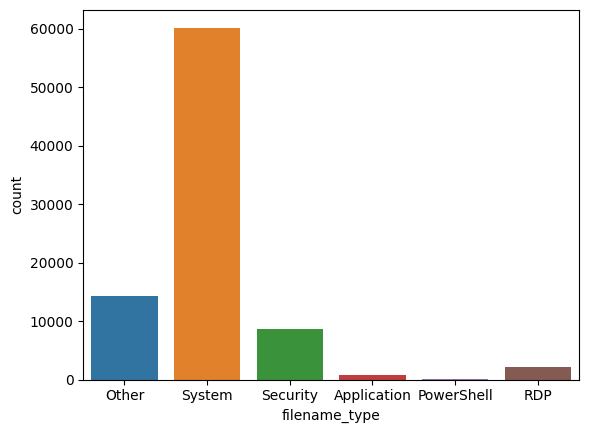

In [5]:
sns.countplot(x='filename_type', data=df)

In [6]:
df['user_sid'].value_counts()

None                                              81286
S-1-5-18                                           4264
S-1-5-21-2232410529-1445159330-2725690660-1602      194
S-1-5-21-2232410529-1445159330-2725690660-1108      115
S-1-5-21-2232410529-1445159330-2725690660-500       114
S-1-0-0                                              96
S-1-5-21-2232410529-1445159330-2725690660-1106       32
S-1-5-90-1                                           24
S-1-5-90-2                                           14
S-1-5-20                                             11
S-1-5-19                                             11
S-1-5-7                                              11
S-1-5-21-2232410529-1445159330-2725690660-1001        4
S-1-5-90-3                                            4
Name: user_sid, dtype: int64

Závěr -> příznak není potřeba

In [7]:
df['channel'].value_counts()

System                                                                    60581
Security                                                                   8574
Microsoft-Windows-GroupPolicy/Operational                                  4035
Microsoft-Windows-RemoteDesktopServices-RdpCoreTS/Operational              2124
Microsoft-Windows-TerminalServices-RemoteConnectionManager/Operational     2047
                                                                          ...  
Microsoft-Windows-Application-Experience/Program-Inventory                    1
Microsoft-Windows-PrintService/Admin                                          1
Microsoft-Windows-NlaSvc/Operational                                          1
Microsoft-Windows-WER-Diag/Operational                                        1
Microsoft-Windows-AppXDeployment/Operational                                  1
Name: channel, Length: 71, dtype: int64

Závěr -> příznak není potřeba